In [121]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## Dataset

The paper deals with a number of datasets, of which the most relevant is the New York Times Corpus (which we were not able to find). Most of the datasets mentioned in the paper contain a large number of texts that represent the English language developing over a hundred years.

However, for practical purposes we couldn't use the raw dataset for this tutorial (due to time constraints). We found a very interesting dataset containing movie lines for about 600 movies from the 1920-2010. The raw dataset is included as part of the repository ( `moviedata.csv.zip` ).

We use the `Word2Vec` embeddings generated from this dataset (generated by training the algorithm on per decade worth of movie lines). More details can be found in the `vector_creation.ipynb`.

The different vector spaces generated by the `gensim` implementation of `Word2Vec` is present in the `models` directory of this repository and we are going to use the pre-trained models for this analysis.

 **Caveat: Since this is a pretty small dataset and does not really represent the language, the following analyses should only be taken as examples of the techniques and not actual research.**

In [122]:
# setting the folder and the model path
FOLDER = './models'
DECADES = {
    '1921_1930': 1920,
    '1931_1940': 1930,
    '1941_1950': 1940,
    '1951_1960': 1950,
    '1961_1970': 1960,
    '1971_1980': 1970,
    '1981_1990': 1980,
    '1991_2000': 1990,
    '2001_2010': 2000
}

## The definition of bias

The paper defines bias as the difference in similarities (either `cosine` or `euclidean distance`) of a word, $\vec{w}$ and a vector representing a group, $\vec{g}$ and the similarity between the $\vec{w}$ and a baseline group $\vec{g_b}$

$$\text{Bias}=\text{sim(}\vec{w},\vec{g}\text{)} - \text{sim(}\vec{w},\vec{g_b}\text{)}$$

$\vec{g_b}$ can represent a single word (like `women` or `male`) or, using vector mean pooling, it can represent a group of words like names (such as `Smith`, `Lopez`, `Yang` etc.)

## Analysis 1. Comparison with women’s occupation participation

_Tutorial Code Credit: Eman Mozaffar_

Here we use the models to compare the group `woman` with words describing occupations such as:
 
doctor, engineer, scientist, programmer, artist, carpenter, mechanic, secretary, housekeeper, nurse, librarian, dancer

**Initialize**

In [123]:
# Define list of some occupations
OCCUPATIONS = ['doctor', 'engineer', 'scientist', 'programmer', 'artist',
               'carpenter', 'mechanic', 'secretary', 'housekeeper',
               'nurse', 'librarian', 'dancer']

# Initialize an empty DataFrame to store bias values
bias_df = pd.DataFrame(index=OCCUPATIONS, columns=DECADES.values())

**Calculate bias**

In [124]:
# Calculate bias for each model
for decade in DECADES:
    # Load the model
    model_filename = f"models/word2vec-movies_{decade}-text.model"
    model = Word2Vec.load(model_filename)
    
    # Calculate bias between "woman" and each occupation
    for occupation in OCCUPATIONS:
        # To find similarity use model.wv.similarity(word1, word2) function
        # TODO 1 Get similarity between `woman` and occupation
        # TODO 2 Get similarity between `man` and occupation
        # TODO 3 Subtract 2 from 1 to get the bias


# Sort occupations by descending order of bias for the first model
sorted_occupations = bias_df.sort_values(by=1920, ascending=False).index

**Visualization**

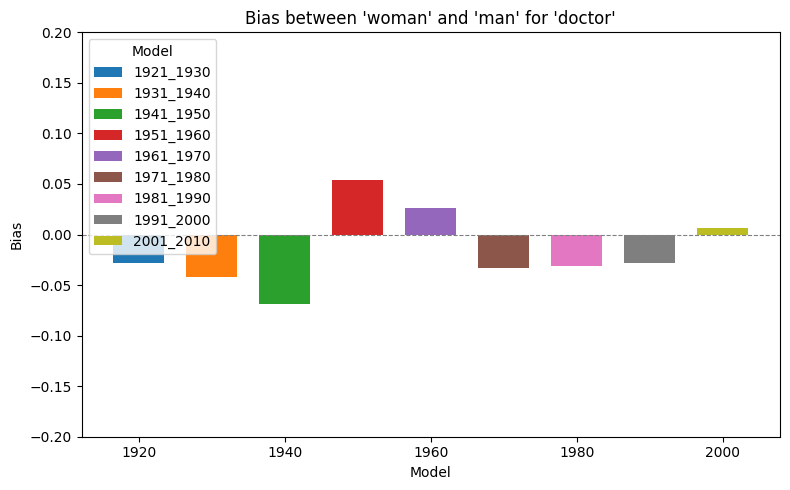

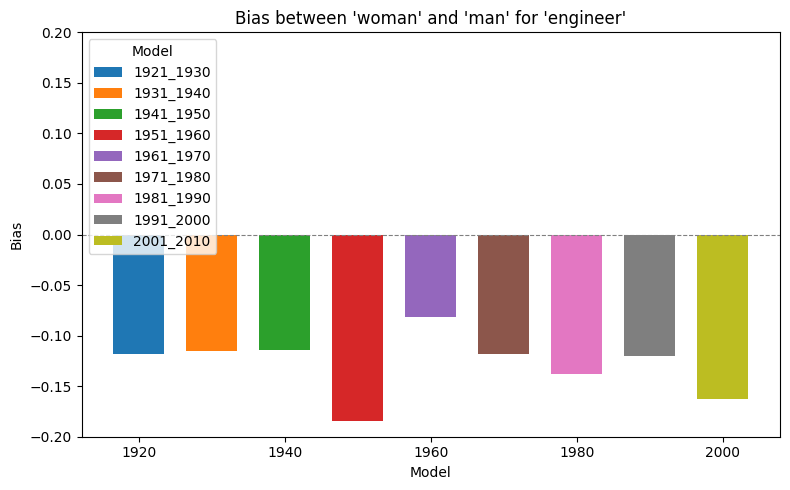

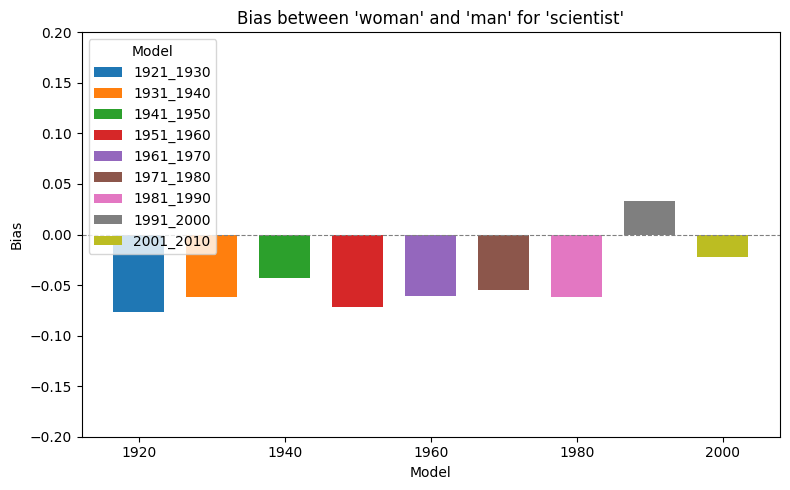

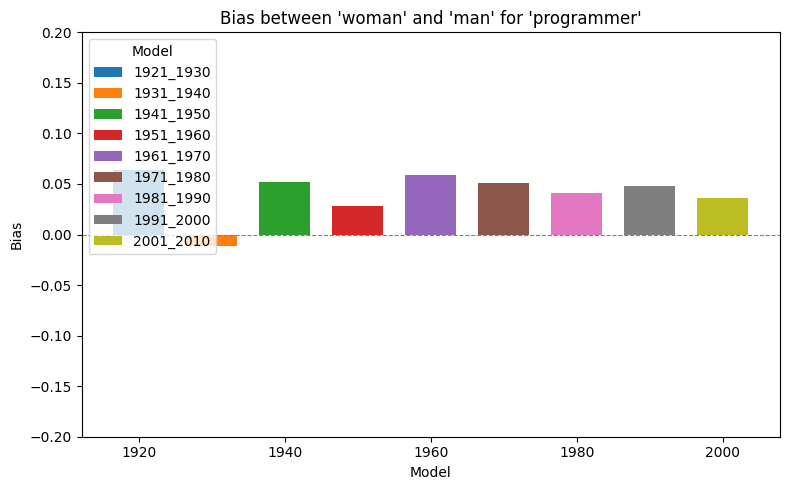

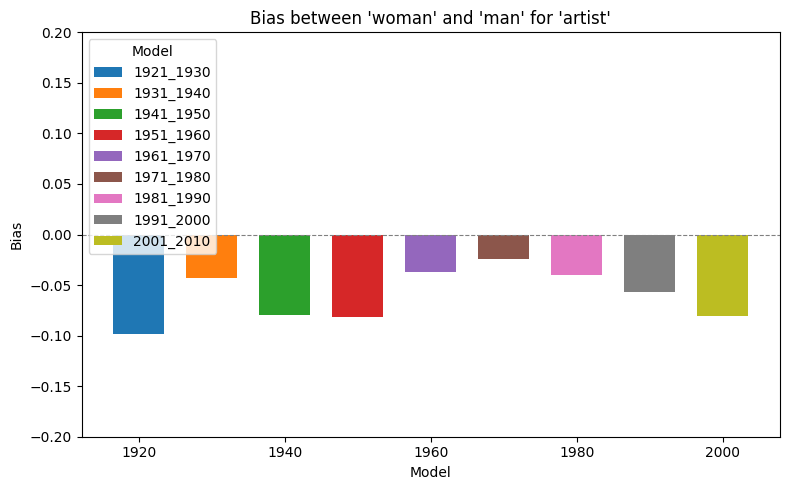

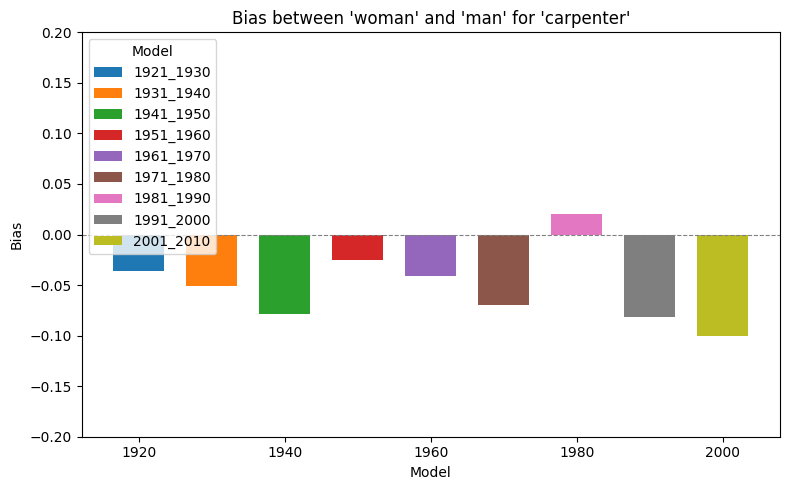

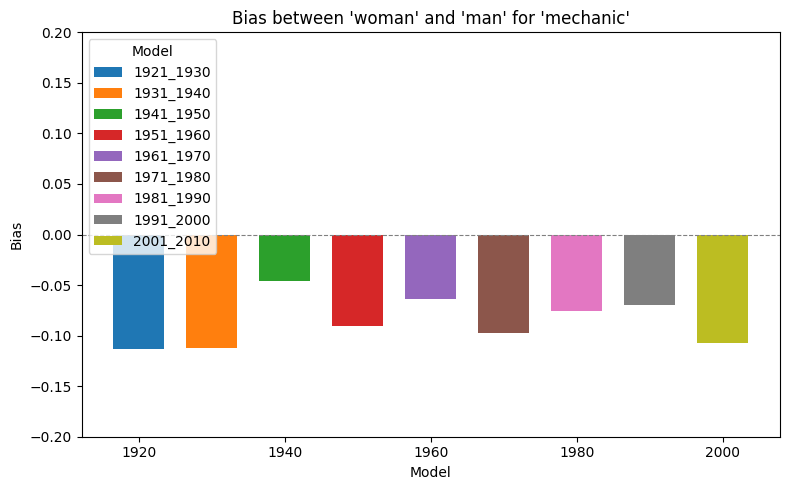

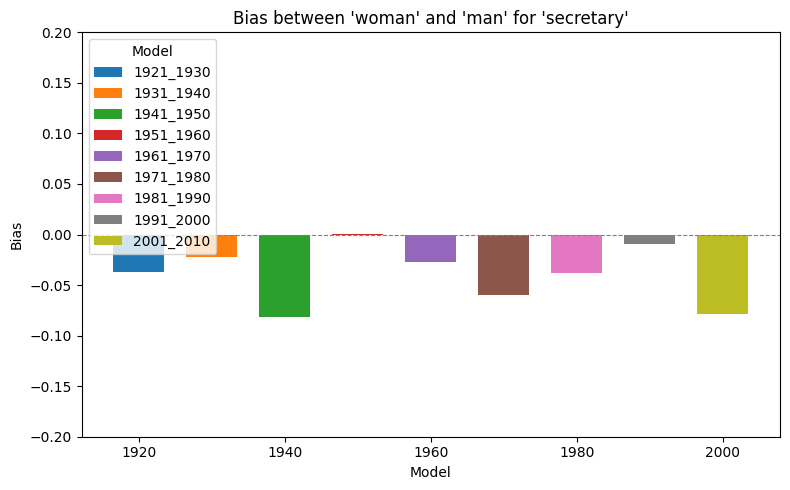

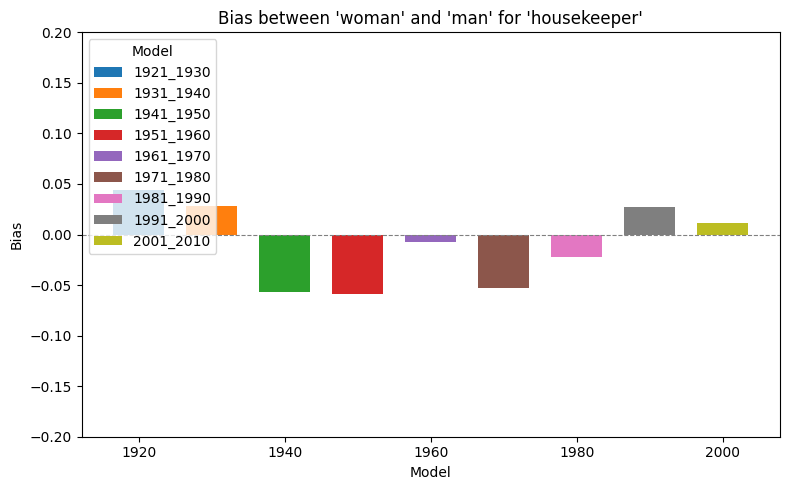

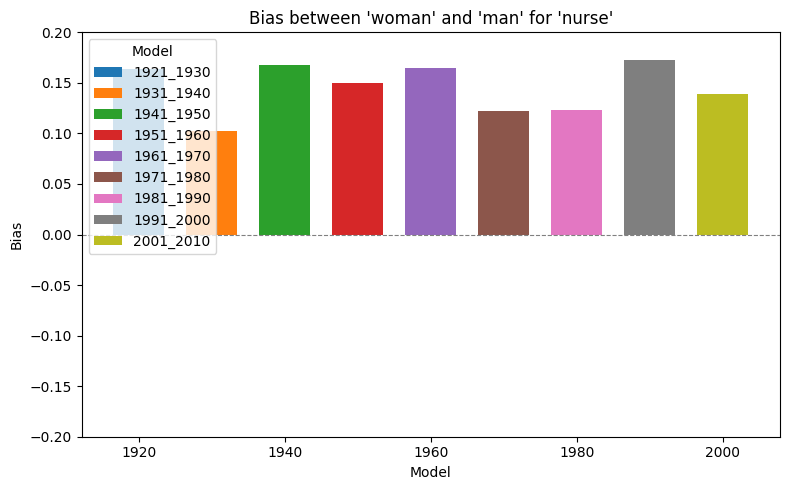

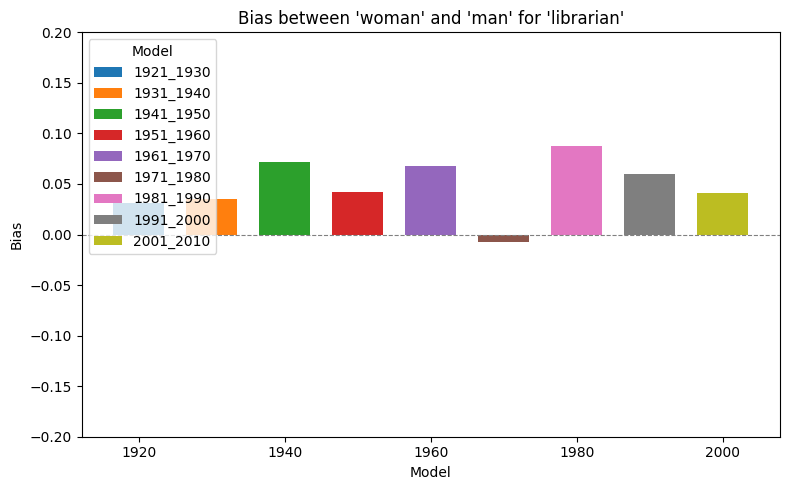

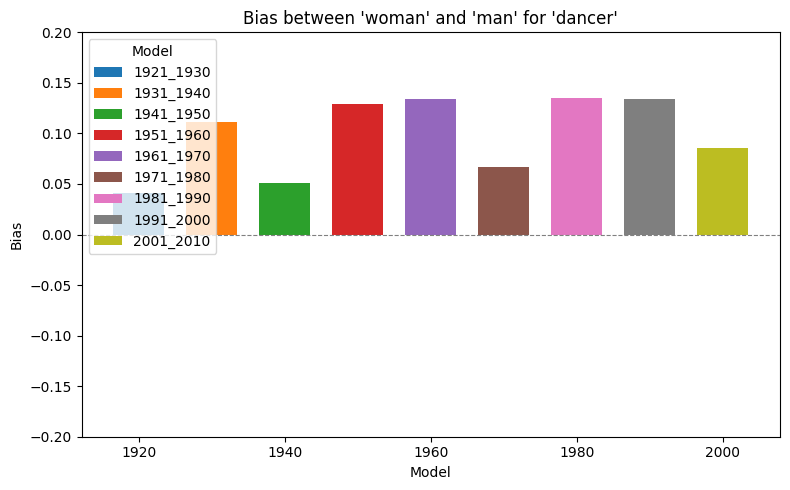

In [125]:
# Plot individual charts for each word pair
for occupation in OCCUPATIONS:
    plt.figure(figsize=(8, 5))
    for decade in DECADES:
        plt.bar(DECADES[decade], 
                bias_df.loc[occupation, DECADES[decade]],
                label=decade,
                width=7)
    plt.title(f"Bias between 'woman' and 'man' for '{occupation}'")
    plt.xlabel('Model')
    plt.ylabel('Bias')
    plt.ylim(top=0.2, bottom=-0.2)
    plt.legend(title='Model', loc='upper left')
    # Add a horizontal line at y=0 for reference
    plt.axhline(0, color='grey', lw=0.8, linestyle='--')
    plt.tight_layout()
    plt.show()

## Analysis 2.Comparison with surveys of ethnic stereotypes.

_Tutorial Code Credit: Prithvijit Dasgupta_

For this analysis, we create groups (using mean pooling) for 5 common last names of different ethnic groups

- **Common Chinese surnames:** 'Wu', 'Li', 'Yang', 'Wang'

- **Common White surnames:** 'Smith', 'Johnson', 'Miller', 'Brown'

- **Common Mexican surnames:** 'Garcia', 'Rodriguez', 'Sanchez', 'Hernandez'

And then, compare the bias between the minority groups and white names for certain stereotype words

Stereotypes: 'Irresponsible', 'Disorganized', 'Envious', 'Outrageous', 'Passive', 'Barbaric', 'Pompous', 'Aggressive','Unstable','Transparent','Monstrous','Forceful','Hateful','Fixed','Cruel','Active','Greedy','Sensitive', 'Bizarre', 'Hearty'

**Initialization**

In [126]:
# Define list of 5 common last names
CHINESE_LAST_NAMES = ['Wu', 'Li', 'Yang', 'Wang']
WHITE_LAST_NAMES = ['Smith', 'Johnson', 'Miller', 'Brown']
MEXICAN_LAST_NAMES = ['Garcia', 'Rodriguez', 'Sanchez', 'Hernandez']

# Defines the ethnic groups for analysis.
GROUPS = ['Chinese', 'Mexican']

# Define list of stereotype words
STEREOTYPE_WORDS = ['Irresponsible', 'Disorganized', 'Envious', 'Outrageous', 'Passive', 'Barbaric', 'Pompous', 'Aggressive',
                    'Unstable', 'Transparent', 'Monstrous', 'Forceful', 'Hateful', 'Fixed', 'Cruel', 'Active', 'Greedy', 'Sensitive', 'Bizarre', 'Hearty']

# Initializes an empty list to store bias information.
bias_array = []

**Calculate bias**

In [127]:
# Calculate bias for each group in every decaded with White names as baseline
for decade in DECADES:
    # Load the model
    model_filename = f"models/word2vec-movies_{decade}-text.model"
    model = Word2Vec.load(model_filename)
    # Here we create an average vector from the names
    base_vectors = []
    for name in WHITE_LAST_NAMES:
        base_vectors.append(model.wv[name.lower()])
    # Get the mean
    mean_base_vector = np.mean(base_vectors, axis=0)
    # Normalise it to perform dot product
    mean_base_vector = mean_base_vector/np.linalg.norm(mean_base_vector)
    # Switching between the groups
    for group in GROUPS:
        if group == 'Chinese':
            group_names = CHINESE_LAST_NAMES
        else:
            group_names = MEXICAN_LAST_NAMES
        # TODO 4 Create the average vector for the ethnic group
        
        
        
        for stype in STEREOTYPE_WORDS:
            # TODO 5 Calculate the bias for the stereotype word between the ethnic group and the baseline

            
            d = {
                'Group': group,
                'Stereotype': stype,
                'Decade': DECADES[decade],
                'Bias': bias
            }
            bias_array.append(d)
# Creating a dataframe out of a list of dicts
bias_df = pd.DataFrame.from_dict(bias_array)

**Visualization**

c:\Users\prith\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


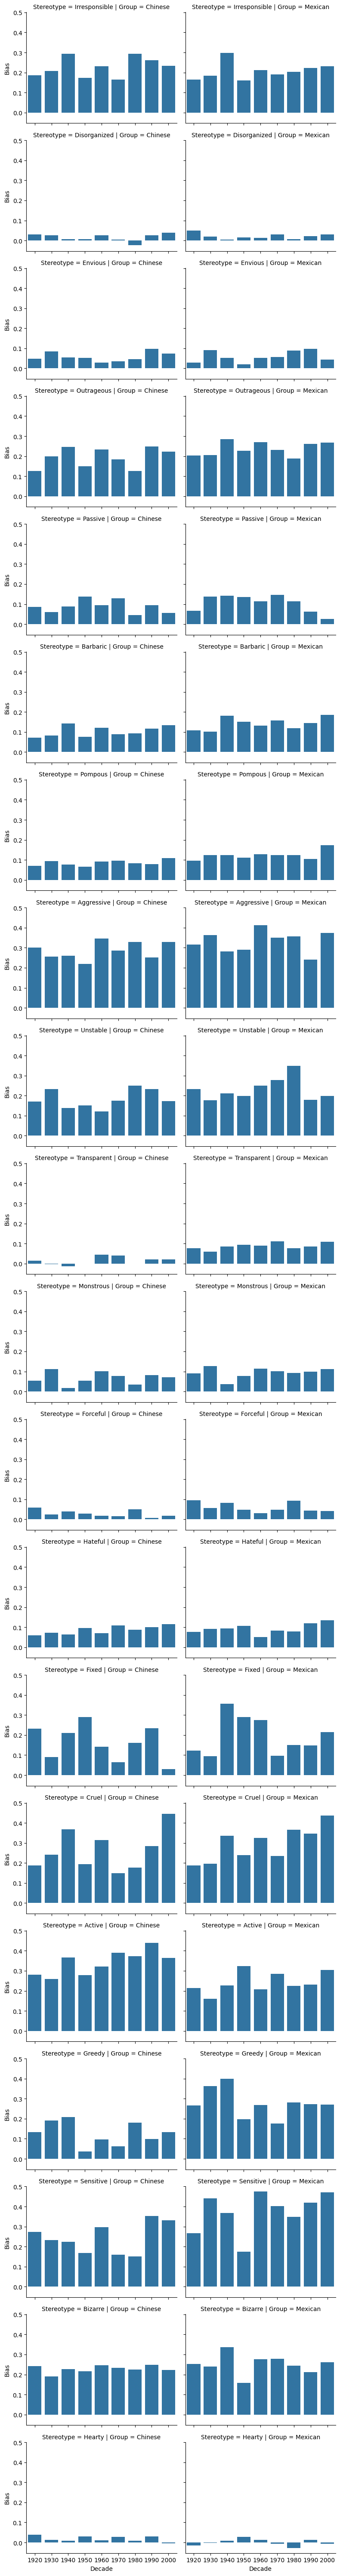

In [128]:
# Using Seaborn to plot the 
grid = sns.FacetGrid(bias_df, row='Stereotype', col='Group',
                     sharex=True, sharey=True, aspect=4/3)
grid.map(sns.barplot, 'Decade', 'Bias', errorbar=None)
plt.tight_layout()

## Analysis 3. Quantifying Changing Attitudes with Adjective Embeddings.

_Tutorial Code Credit: Prithvijit Dasgupta_
We compare the word 'female' with various adjectives. We want to observe if the decades correlate with each other when considering the similarity of a word and a group (`female`).

**Initialize**

In [129]:
ADJECTIVES = []
# load adjectives from file
with open('./adjectives.txt', 'r') as file:
    for line in file:
        ADJECTIVES.append(line.strip())

# initialize an empty array to store the data
similarity_array = []

**Calculate similarity**

In [130]:
# Calculate bias for each group in every decaded with White names as baseline
for decade in DECADES:
    # Load the model
    model_filename = f"models/word2vec-movies_{decade}-text.model"
    model = Word2Vec.load(model_filename)
    for adjective in ADJECTIVES:
        try:
            similarity = model.wv.similarity('female', adjective)
            d = {
                'Adjective': adjective,
                'Decade': DECADES[decade],
                'Sim': similarity
            }
            similarity_array.append(d)
        except:
            # the try-catch block is because some adjectives 
            # don't exist in our dataset
            continue

**Visualization**

<Axes: xlabel='Decade', ylabel='Decade'>

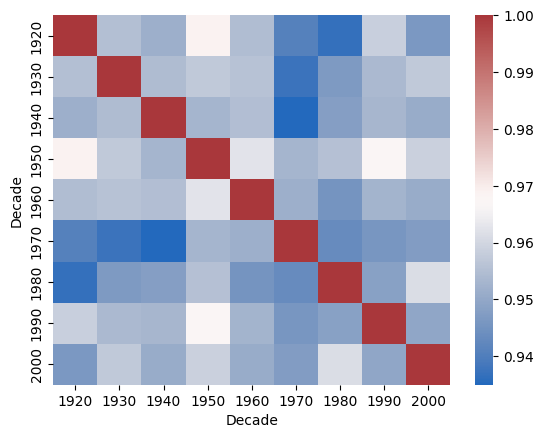

In [131]:
# TODO 6 Create a dataframe and pivot it to create a table with rows as adjectives
# columns as decades and the values being the similarity values


# TODO 7 Plot the correlation heatmap (remember SI 618)


## Analysis 4. Mean bias of individual words whose biases changed over time

_Tutorial code credit: Tzu-Yu Ko_

This analysis is to check if there exists an overall bias (across the decades) towards a group for certain words. We use `man` as the baseline group and `woman` as the group for calculating bias.

**Initialize**

In [132]:
# Define word lists
competence_words = ['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 'thoughtful', 'sage',
                    'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent', 'apt', 'genius', 'wise']
physical_appearance_words = ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat', 'weak', 'thin', 'pretty',
                             'beautiful', 'strong']

# Initialize empty DataFrames to store aggregated bias values over time
aggregated_bias_competence = pd.DataFrame(
    index=competence_words, columns=['Mean_Bias'])
aggregated_bias_appearance = pd.DataFrame(
    index=physical_appearance_words, columns=['Mean_Bias'])

In [133]:
# Calculate bias for each model for competence words
for decade in DECADES:
    # Load the model
    model_filename = f"models/word2vec-movies_{decade}-text.model"
    model = Word2Vec.load(model_filename)

    # Calculate bias between "woman" and each competence word
    for word in competence_words:
        if word in model.wv.key_to_index:  # Check if the word is present in the vocabulary
            bias = model.wv.similarity(
                'woman', word) - model.wv.similarity('man', word)
            # Accumulate bias values over time
            if word in aggregated_bias_competence.index:
                if pd.isnull(aggregated_bias_competence.loc[word, 'Mean_Bias']):
                    aggregated_bias_competence.loc[word, 'Mean_Bias'] = bias
                else:
                    aggregated_bias_competence.loc[word, 'Mean_Bias'] += bias
        else:
            print(
                f"Word '{word}' not present in the vocabulary of model '{model_filename}'")
    
    #TODO 8 Calculate bias between "woman" and each physical appearance word
    

# Calculate mean bias over time
aggregated_bias_competence['Mean_Bias'] /= len(DECADES)
aggregated_bias_appearance['Mean_Bias'] /= len(DECADES)

Word 'precocious' not present in the vocabulary of model 'models/word2vec-movies_1921_1930-text.model'
Word 'sagacious' not present in the vocabulary of model 'models/word2vec-movies_1921_1930-text.model'
Word 'inventive' not present in the vocabulary of model 'models/word2vec-movies_1921_1930-text.model'
Word 'adaptable' not present in the vocabulary of model 'models/word2vec-movies_1921_1930-text.model'
Word 'discerning' not present in the vocabulary of model 'models/word2vec-movies_1921_1930-text.model'
Word 'judicious' not present in the vocabulary of model 'models/word2vec-movies_1921_1930-text.model'
Word 'venerable' not present in the vocabulary of model 'models/word2vec-movies_1921_1930-text.model'
Word 'precocious' not present in the vocabulary of model 'models/word2vec-movies_1931_1940-text.model'
Word 'sagacious' not present in the vocabulary of model 'models/word2vec-movies_1931_1940-text.model'
Word 'inventive' not present in the vocabulary of model 'models/word2vec-movies

**Visualization**

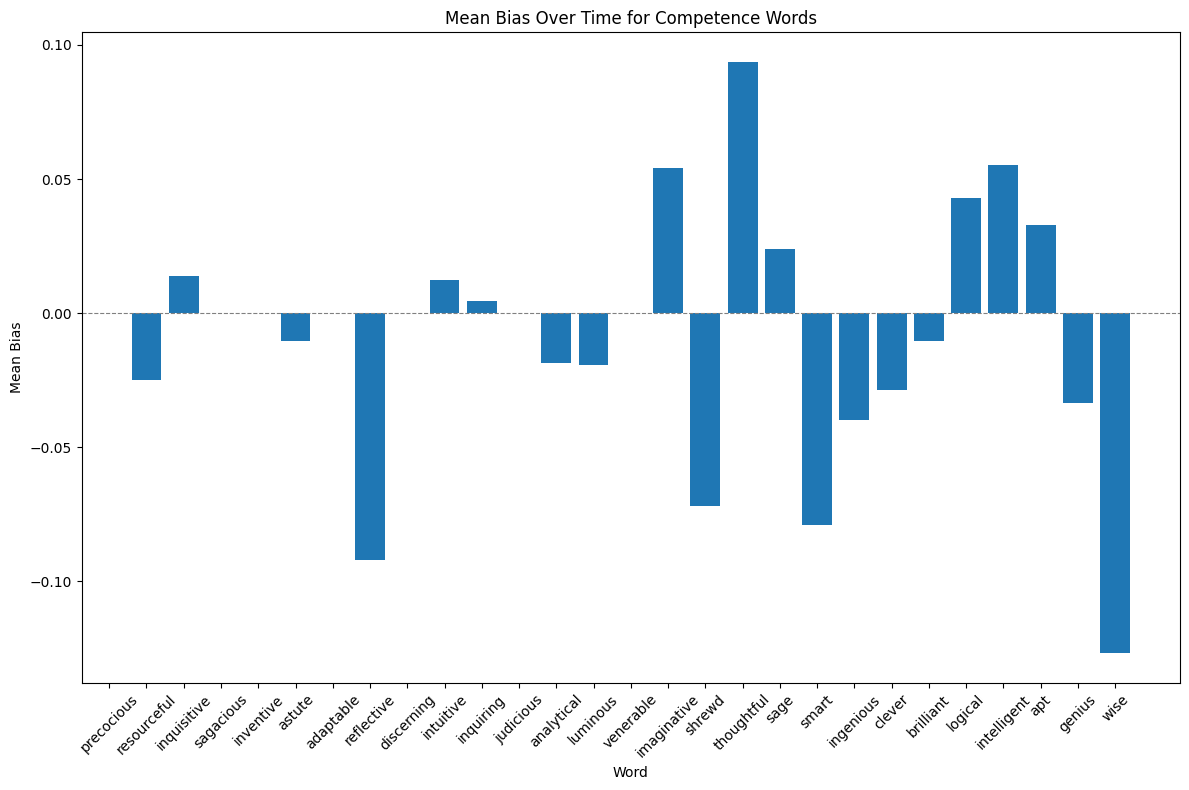

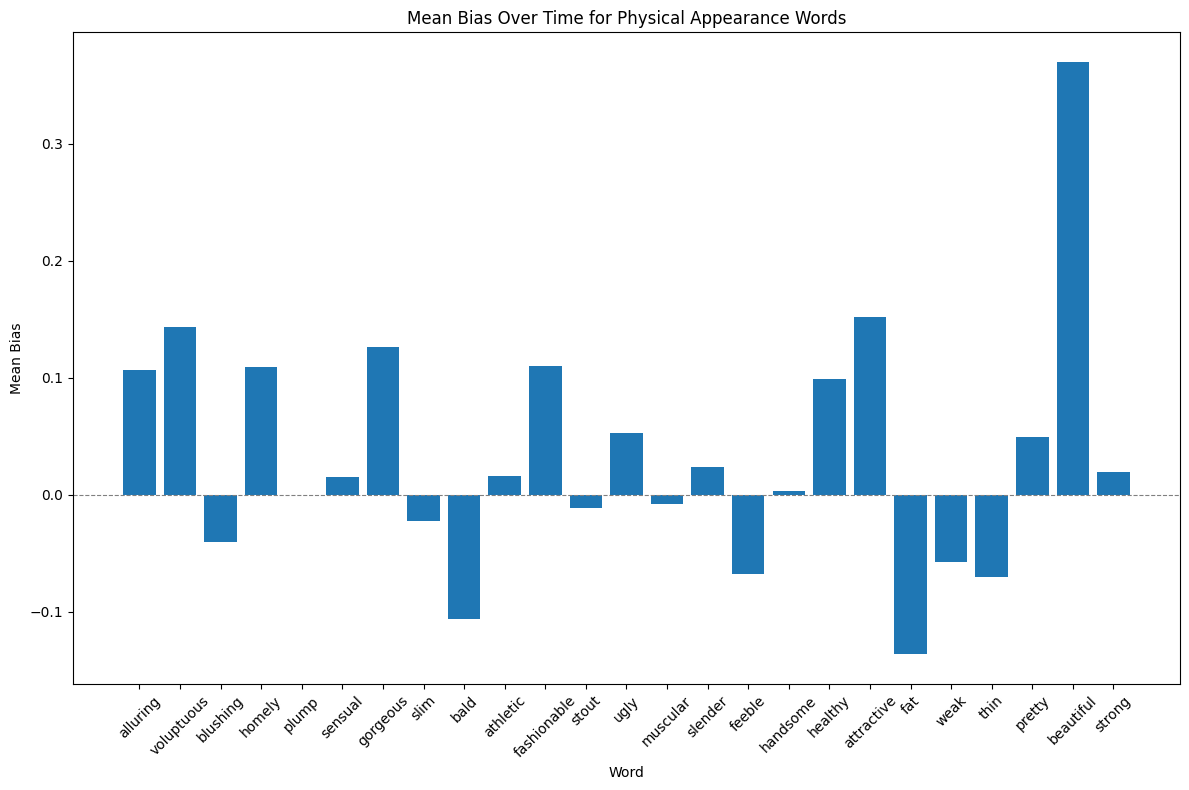

In [134]:
# Plotting mean bias over time for competence words
plt.figure(figsize=(12, 8))
plt.bar(aggregated_bias_competence.index,
        aggregated_bias_competence['Mean_Bias'])
plt.title('Mean Bias Over Time for Competence Words')
plt.xlabel('Word')
plt.ylabel('Mean Bias')
# Add a horizontal line at y=0 for reference
plt.axhline(0, color='grey', lw=0.8, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# TODO 9 Plotting mean bias over time for physical appearance words


## Analysis 5: Trends in Asian Stereotypes

_Tutorial Code Credit: Xichen Zhu_

Here, we use L2 norms over concept groups and compare between ethnic Asian names and White names.

**Initialize**

In [135]:
# Some Asian last names
asian_last_names = ['chung', 'liu', 'wong', 'huang', 'ng', 'hu', 'chu', 'chen', 'lin',
                    'liang', 'wang', 'wu', 'yang', 'tang', 'chang', 'hong', 'li']  # 17 asian_last_names

# Some White last names
white_last_names = ["smith", "johnson", "williams", "brown", "jones", "miller", "davis", "garcia", "rodriguez", "wilson", "martinez", "anderson",
                    "taylor", "thomas", "martin", "jackson", "thompson"]  # 17 white_last_names

# Concepts
good_adjectives = ["intelligent", "diligent", "compassionate", "generous",
                   "curious", "empathetic", "supportive", "kind", "creative", "reliable"]
bad_adjectives = ["cruel", "selfish", "greedy", "malicious", "deceitful",
                  "ruthless", "arrogant", "vindictive", "negligent", "ignorant"]
neutral_adjectives = ["obedient", "independent", "reserved", "practical",
                      "methodical", "objective", "skeptical", "traditional", "innovative", "pensive"]

# models
models = {f'{num}s': Word2Vec.load(f'models/word2vec-movies_{decade}-text.model') for decade, num in DECADES.items()}

**Helper functions**

In [136]:
# Function to calculate the normalized centroid of vectors for a list of names
def calculate_centroids(model, name_list):
    # Filter out names that are not in the model's vocabulary
    valid_names = [name for name in name_list if name in model.wv.key_to_index]
    # Retrieve and stack the vectors for the valid names
    name_vectors = np.array([model.wv[name] for name in valid_names])
    # Calculate the mean vector (centroid) of these vectors
    centroid = np.mean(name_vectors, axis=0)
    # Normalize and return the centroid vector
    return centroid / np.linalg.norm(centroid)

# Function to compute bias scores based on distance between adjective vectors and centroids
def compute_bias_scores(models, asian_centroids, white_centroids, adjectives):
    # Initialize a dictionary to hold bias scores for each decade
    bias_scores = {decade: 0 for decade in models.keys()}
    # Iterate over each decade and its corresponding model
    for decade, model in models.items():
        # For each adjective, calculate bias if the adjective is in the model's vocabulary
        for adj in adjectives:
            if adj in model.wv.key_to_index:
                # Get the vector for the adjective
                adj_vector = model.wv[adj]
                # Calculate the distance from the adjective vector to both centroids
                distance_to_asian = np.linalg.norm(adj_vector - asian_centroids[decade])
                distance_to_white = np.linalg.norm(adj_vector - white_centroids[decade])
                # Update the bias score for the decade by the difference in distances
                bias_scores[decade] += (distance_to_white - distance_to_asian)
    # Return the dictionary of bias scores
    return bias_scores

# Function to plot the bias scores over time
def plot_bias_over_time(bias_scores, title):
    # Sort the decades and get the corresponding scores
    decades = sorted(bias_scores.keys())
    scores = [bias_scores[decade] for decade in decades]

    # Set up the plot
    plt.figure(figsize=(10, 5))
    plt.plot(decades, scores, marker='o')
    plt.title(f'Bias Score Over Time for {title}')
    plt.xlabel('Decades')
    plt.ylabel('Relative Norm Distance Bias Score')
    # Add a horizontal line at y=0 for reference
    plt.axhline(0, color='grey', lw=0.8, linestyle='--')
    # Display the plot
    plt.show()

**Calculate and plot adjective bias**

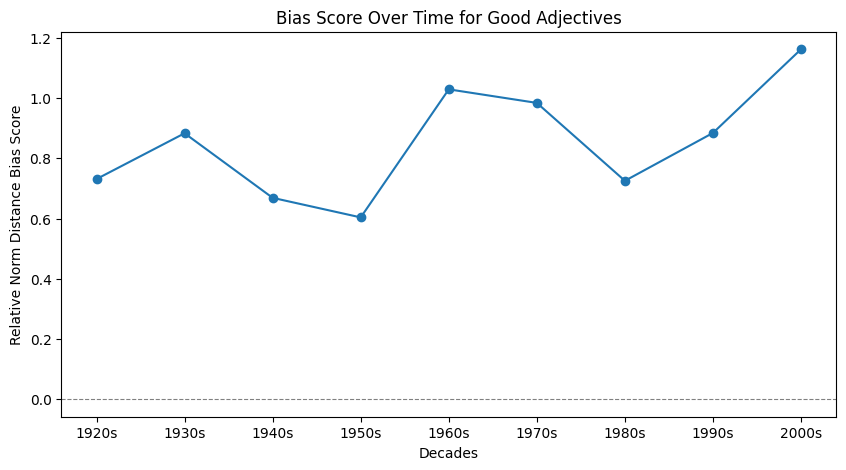

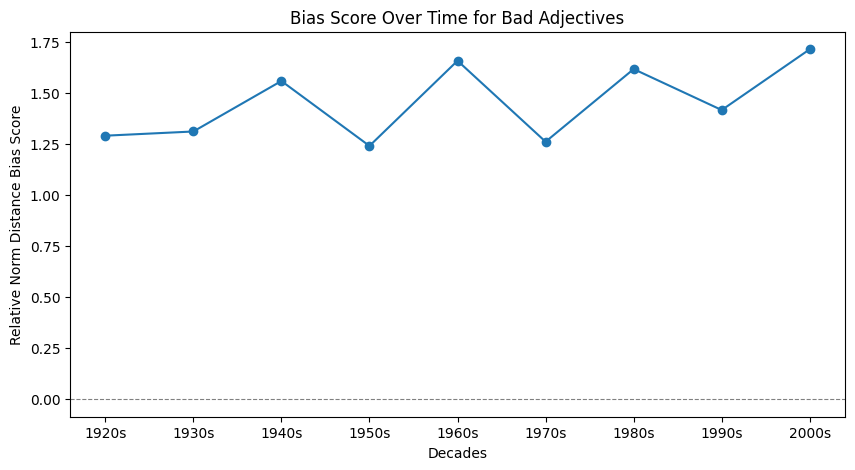

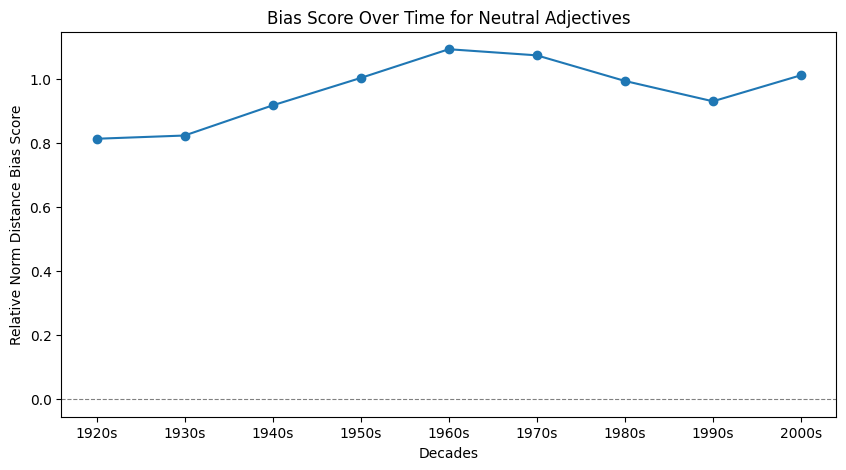

In [137]:
# Pre-calculate centroids for Asian and White names across different decades
asian_centroids = {}
white_centroids = {}
for decade, model in models.items():
    asian_centroids[decade] = calculate_centroids(model, asian_last_names)
    white_centroids[decade] = calculate_centroids(model, white_last_names)

# Compute bias scores for good, bad, and neutral adjectives
good_bias_scores = compute_bias_scores(models, asian_centroids, white_centroids, good_adjectives)
# TODO 10 Use the compute_bias_scores for bad and neutral adjectives


# Plot the bias scores over time for different sets of adjectives
plot_bias_over_time(good_bias_scores, 'Good Adjectives')
plot_bias_over_time(bad_bias_scores, 'Bad Adjectives')
plot_bias_over_time(neutral_bias_scores, 'Neutral Adjectives')